# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 1 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
#from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [2]:
# Your code goes here
datasetA=pd.read_csv(os.path.join(os.getcwd(),"datasets","train_20news_partA.csv"))

### ========== Question 1.2 ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [3]:
# Your code goes here
datasetA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


### ========== Question 1.3 ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

*Your answer goes here*

There are 2129 data points.
There are 520 attributes left to useto model the target variable 'class'



### ========== Question 1.4  ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [4]:
# Your code goes here
datasetA.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 ==========
Display the first 7 instances of dataset A.

In [5]:
# Your code goes here
datasetA.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [6]:
# Your code goes here
print(datasetA.columns[:100])

Index(['w1_aaa', 'w2_pins', 'w3_kmr', 'w4_notion', 'w5_queens', 'w6_dwyer',
       'w7_defenseman', 'w8_gld', 'w9_tocchet', 'w10_home', 'w11_buying',
       'w12_internet', 'w13_slots', 'w14_compatible', 'w15_transfer',
       'w16_baltimore', 'w17_mean', 'w18_person', 'w19_performance',
       'w20_support', 'w21_tor', 'w22_gm', 'w23_mouse', 'w24_base',
       'w25_population', 'w26_bob', 'w27_set', 'w28_it', 'w29_earth',
       'w30_faith', 'w31_steve', 'w32_caps', 'w33_printer', 'w34_east',
       'w35_cable', 'w36_adapter', 'w37_mss', 'w38_catcher', 'w39_bullpen',
       'w40_obp', 'w41_innocent', 'w42_european', 'w43_angeles',
       'w44_settings', 'w45_words', 'w46_rit', 'w47_shots', 'w48_ports',
       'w49_vga', 'w50_coverage', 'w51_jumpers', 'w52_bases', 'w53_sea',
       'w54_pts', 'w55_behavior', 'w56_domi', 'w57_sabres', 'w58_yzerman',
       'w59_messier', 'w60_goalies', 'w61_hawks', 'w62_our', 'w63_sx',
       'w64_view', 'w65_hitters', 'w66_richard', 'w67_point', 'w68_n

### ========== Question 1.7 ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

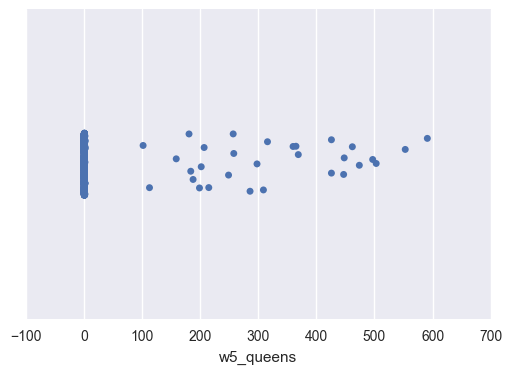

In [7]:
# Your code goes here
sns.stripplot(data=datasetA,x="w5_queens",jitter=True)

### ========== Question 1.8 ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [8]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

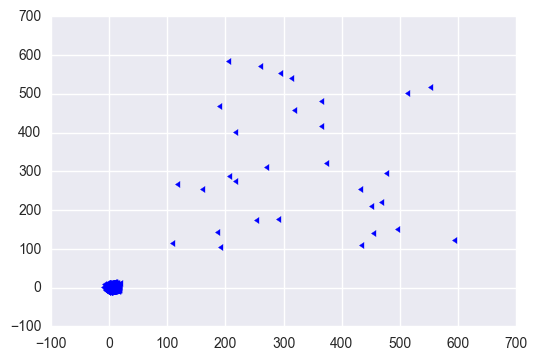

In [9]:
# Your code goes here
scatter_jitter(datasetA["w5_queens"],datasetA["w24_base"],jitter=0.1)

### ========== Question 1.9 ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

In [10]:
# Your code goes here
news_A_clean=datasetA.copy(deep=True)
news_A_clean=news_A_clean[news_A_clean<100]
news_A_clean.dropna(axis=0,how="any",inplace=True)
news_A_clean

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,5.0,3.0,6.0,8.0,4.0,6.0,4.0,8.0,4
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,3.0,6.0,8.0,3.0,4.0,5.0,6.0,5.0,4
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,4.0,2.0,6.0,5.0,2.0,5.0,5.0,7.0,8.0,2
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,3.0,6.0,1.0,1.0,8.0,1.0,8.0,4.0,3
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,1.0,7.0,8.0,6.0,3.0,1.0,8.0,4.0,3
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,7.0,5.0,4.0,5.0,5.0,7.0,7.0,7.0,2.0,2
6,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,3.0,6.0,8.0,8.0,3.0,5.0,2.0,1.0,2.0,1
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,8.0,6.0,2.0,3.0,7.0,8.0,2.0,5.0,3
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,3.0,7.0,8.0,1.0,2.0,3.0,2.0,6.0,5
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,7.0,2.0,4.0,1.0,2.0,5.0,7.0,1.0,1


### ========== Question 1.10 ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [11]:
# Your code goes here
print("Number of data points:{}".format(news_A_clean.shape[0]))
print("Number of data points excluded as outliers:{}".format(datasetA.shape[0]-news_A_clean.shape[0]))

Number of data points:2091
Number of data points excluded as outliers:38


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/0.17/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

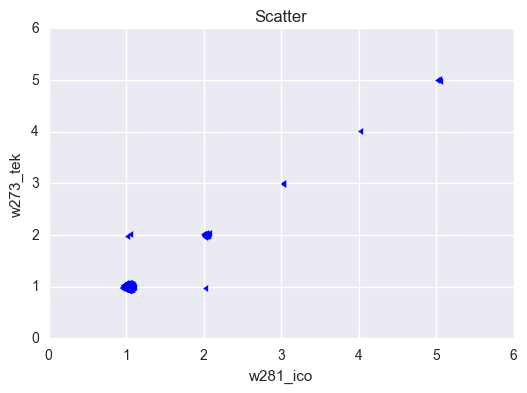

In [12]:
# Your code goes here
#scatter_jitter(arr1=datasetA["w281_ico"],arr2=datasetA["w273_tek"],jitter=0.1)
scatter_jitter(arr1=news_A_clean["w281_ico"],arr2=news_A_clean["w273_tek"],jitter=0.1)
plt.title("Scatter")
plt.xlabel("w281_ico")
plt.ylabel("w273_tek")

### ========== Question 2.2 ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

*Your answer goes here:*
The new scatter plot suggests that for each word there's a decrease in the number of possible discreate values that represent the frequency that word.
With Naive Bayes assumption taken into consideration, this suggests a decrease in the number of parameter(in this case the conditional probabilities)we need to estimate.
Without this assumption, we may encounter huge amount of parameters to be estimated and some of the parameters will not be easily estimated due to data sparsity.



### ========== Question 2.3 ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [13]:
# Your code goes here
import sklearn.naive_bayes
GNBC1=sklearn.naive_bayes.GaussianNB()
GNBC1.fit(X=news_A_clean.drop(axis=1,labels=["class"],inplace=False),y=news_A_clean["class"])

GaussianNB(priors=None)

### ========== Question 2.4 ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

Normalized confusion matrix:
[[ 0.96657382  0.00278552  0.03064067  0.          0.        ]
 [ 0.          0.69928401  0.30071599  0.          0.        ]
 [ 0.          0.01658768  0.98341232  0.          0.        ]
 [ 0.00671141  0.00894855  0.06487696  0.91946309  0.        ]
 [ 0.00225225  0.00225225  0.03153153  0.07882883  0.88513514]]
Fitness score:0.8890483022477284


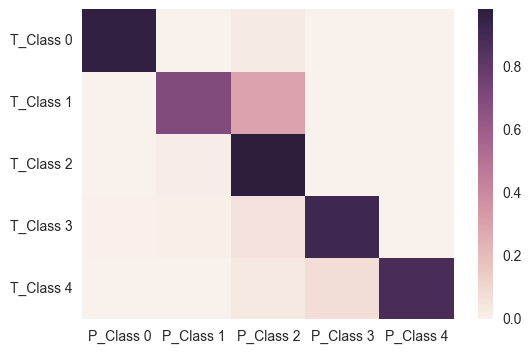

In [14]:
# Your code goes here
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred=GNBC1.predict(X=news_A_clean.drop(axis=1,labels=["class"],inplace=False)),y_true=news_A_clean["class"])
cm=cm.T
cm=cm/cm.sum(axis=0)
cm=cm.T
sns.heatmap(data=cm,xticklabels=["P_Class "+str(i) for i in range(5)],yticklabels=["T_Class "+str(i) for i in range(5)])
print("Normalized confusion matrix:\n{}".format(cm))
print("Fitness score:{}".format(GNBC1.score(X=news_A_clean.drop(axis=1,labels=["class"],inplace=False),y=news_A_clean["class"])))

### ========== Question 2.5  ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

*Your answer goes here*
From the heatmap we can see that the diagonal values in confusion matrix are high, while the others are low. This suggests that after filtering the outliers, the Gaussian Naive Bayesian Classfier satisfatorily fits the training data. 

### ========== Question 2.6 ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

Normalized confusion matrix:
[[ 0.00271739  0.          0.98369565  0.00543478  0.00815217]
 [ 0.          0.          0.98594848  0.00234192  0.0117096 ]
 [ 0.          0.          0.9882904   0.00234192  0.00936768]
 [ 0.          0.          0.9845815   0.0154185   0.        ]
 [ 0.          0.          0.98454746  0.          0.01545254]]
Accuracy:0.2052606857679662


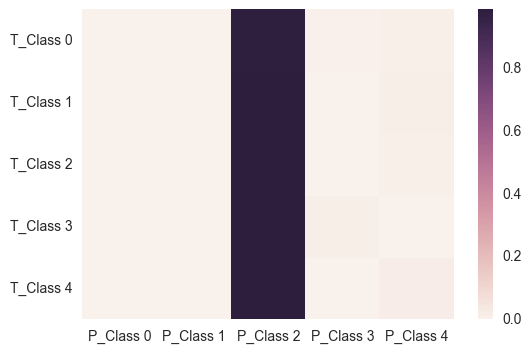

In [15]:
# Your code goes here
GNBC2=sklearn.naive_bayes.GaussianNB()
GNBC2.fit(X=datasetA.drop(axis=1,labels=["class"],inplace=False),y=datasetA["class"])
cm=confusion_matrix(y_pred=GNBC2.predict(X=datasetA.drop(axis=1,labels=["class"],inplace=False)),y_true=datasetA["class"])
cm=cm.T
cm=cm/cm.sum(axis=0)
cm=cm.T
sns.heatmap(data=cm,xticklabels=["P_Class "+str(i) for i in range(5)],yticklabels=["T_Class "+str(i) for i in range(5)])
print("Normalized confusion matrix:\n{}".format(cm))
print("Accuracy:{}".format(GNBC2.score(X=datasetA.drop(axis=1,labels=["class"]),y=datasetA["class"])))

### ========== Question 2.7 ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

*Your answer goes here*
Compared with the result of Question 2.4, the result shown above suggest a low accuracy of the Gaussian Naive Bayes Classifier generated from "unclean" dataset which contain outliers. 
In some cases, outliers suggest noise in the original data, which may lead to distortion of our estimated function when estimating parameters of Gaussian Distrubution for each feature. 

In Gaussian Naive Bayesian Classifiers, the assumption is that the features are conditionally independent and distribution of each feature is Gaussian. This suggest a low probability of the occurence of outliers. Thus Gaussian Naive Bayesian Classfiers will not fit those datasets which contains many outliers very well because they are unlikely to suffice such assumption. So we need to remove the outliers before training the Gaussian Naive Bayesian Classfier. 

### ========== Question 2.8 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

Normalized confusion matrix for test data:
[[ 0.95        0.          0.          0.05        0.        ]
 [ 0.          0.65625     0.34375     0.          0.        ]
 [ 0.          0.13636364  0.86363636  0.          0.        ]
 [ 0.          0.          0.11538462  0.88461538  0.        ]
 [ 0.          0.03571429  0.          0.07142857  0.89285714]]
Fitness score for test data:0.8359375


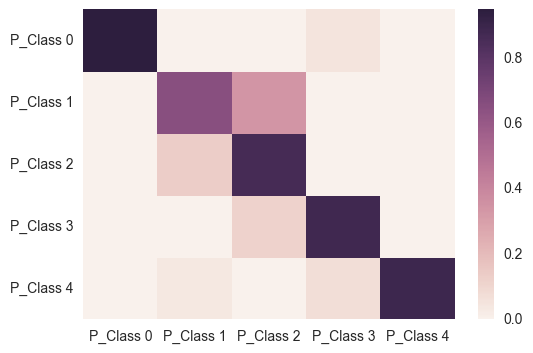

In [16]:
# Your code goes here
datasetB=pd.read_csv(os.path.join(os.getcwd(),"datasets","train_20news_partB.csv"))
test_cm=confusion_matrix(y_pred=GNBC1.predict(X=datasetB.drop(axis=1,inplace=False,labels=["class"])),y_true=datasetB["class"])
test_cm=test_cm.T
test_cm=test_cm/test_cm.sum(axis=0)
test_cm=test_cm.T
sns.heatmap(data=test_cm,xticklabels=["P_Class "+str(i) for i in range(5)],yticklabels=["P_Class "+str(i) for i in range(5)])
print("Normalized confusion matrix for test data:\n{}".format(test_cm))
print("Fitness score for test data:{}".format(GNBC1.score(X=datasetB.drop(axis=1,inplace=False,labels=["class"]),y=datasetB["class"])))

### ========== Question 2.9 ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

*Your answer goes here*
For all classes except Class 1, the probability of $P\left(y_{True}=i|y_{Predict}=i\right)$ exceeds 80%, which may be acceptable. 
The easiest and most difficult classes to predict are Class 0 and Class 2. 


### ========== Question 2.10 ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

*Your answer goes here*
The error rate for test data and the seperation between the error rate of test data and that of training data.


### ========== Question 2.11 ==========

Estimate the baseline performance.

In [17]:
# Your code goes here
print("Error rate of test data:{}".format(1-GNBC1.score(X=datasetB.drop(axis=1,inplace=False,labels=["class"]),y=datasetB["class"])))
Overfitting_score=GNBC1.score(X=news_A_clean.drop(axis=1,inplace=False,labels=["class"]),y=news_A_clean["class"])-GNBC1.score(X=datasetB.drop(axis=1,inplace=False,labels=["class"]),y=datasetB["class"])
print("Overfitting score:{}\n".format(Overfitting_score) if Overfitting_score>0 else "",end="")

Error rate of test data:0.1640625
Overfitting score:0.05311080224772835


### ========== Question 2.12 ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

Classification accuracy on the test set by using a Random Forest: 0.8984375


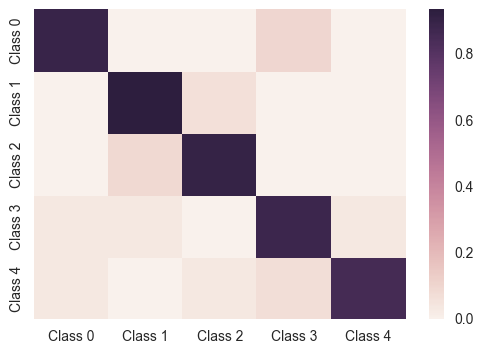

In [18]:
from sklearn.ensemble import RandomForestClassifier
#original code modified
from sklearn.metrics import accuracy_score
news_B=pd.read_csv(os.path.join(os.getcwd(),"datasets","train_20news_partB.csv"))
X_tr=news_A_clean.drop(axis=1,labels=["class"],inplace=False)
y_tr=news_A_clean["class"]
y_ts=news_B["class"]
#end of modification
rf = RandomForestClassifier(n_estimators = 50).fit(X=X_tr, y=y_tr)
X_ts = news_B.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)
# Your code goes here
def plot_confusion_matrix(cm_norm,classes=None):
    if classes==None:
        sns.heatmap(data=cm_norm)
    else:
        sns.heatmap(data=cm_norm,xticklabels=classes,yticklabels=classes)
classes=["Class "+str(i) for i in range(5)]#For this case specifically. Otherwise there will be bugs. 
#news_B=datasetB.copy(deep=True)
#end of my code
print('Classification accuracy on the test set by using a Random Forest:', accuracy_score(y_ts, rf.predict(X=X_ts)))
plt.figure()
cm = confusion_matrix(y_ts, rf_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=classes)

### ========== Question 2.13 ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier.

*Your answer goes here.*
Appearently the Random Forest fits the test data better with respect to Class 1 especailly. For some of the attributes they are not that "compatilbe with" the assumption that it is a Gaussian Distribution, it may cause misclassification. 